# SENTIMENT ANALYSIS USING TWITTER DATASET

### SUBMITTED BY : 
1. PRATEEK SARNA
2. MOULSHREE KANDORIA
3. ANKITA KUMARI

## Description

A Twitter sentiment analysis identifies negative, positive, or neutral emotions within the text of a tweet. It is a text analysis using natural language processing (NLP) and machine learning.

It identifies and extracts subjective information from original data, providing a company with a better understanding of the social sentiment of its brand, product, or service. At the same time, analyze the online conversations of customers.

## Flow

#### The flow of the solution is -  
1. Data Collection
2. Data Cleaning
3. Data Visualization
4. Creating Testing & Training Data
5. Model Evaluation
6. Model Building

## Explaination Of The Solution



1. Data Collection: The Twitter dataset is collected and stored in a CSV file.
2. Data Cleaning: The dataset is cleaned by removing stopwords, punctuations, repeating characters, and URLs from the text. The text is also converted to lowercase.
3. Data Visualization: The distribution of positive and negative comments is visualized using a bar chart.
4. Creating Testing & Training Data: The dataset is split into training and testing data.
5. Model Evaluation: The performance of the model is evaluated using metrics such as confusion matrix, classification report, and ROC curve.
6. Model Building: The model is built using algorithms such as Naive Bayes, Support Vector Machine, and Logistic Regression.

### Data Set Link
https://www.kaggle.com/datasets/kazanova/sentiment140?resource=download

### Creating Path

In [1]:
path = 'tweets.csv'

### Importing Libraries

In [2]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
import warnings
import seaborn as sn
from wordcloud import WordCloud
import string
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_curve, auc
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')

## Data Gathering

### Creating Data Frame

In [3]:
data_frame = pd.read_csv(path, encoding = 'ISO-8859-1')
## set column names
data_frame.columns = ['Target', 'Id', 'Date_Time', 'Flag', 'User', 'Text']
## show dataFrame
data_frame.head()

,Target,Id,Date_Time,Flag,User,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


### Describing Data Frame

In [4]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Target     1599999 non-null  int64 
 1   Id         1599999 non-null  int64 
 2   Date_Time  1599999 non-null  object
 3   Flag       1599999 non-null  object
 4   User       1599999 non-null  object
 5   Text       1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


### Data Frame Shape

In [5]:
data_frame.shape

(1599999, 6)

### Explaing Target
Target represents - (0 = negative, 2 = neutral, 4 = positive)

In [6]:
## extracting unique values from the target column
targets = data_frame.Target.unique().tolist()
targets

[0, 4]

This shows that this data set only has negative and positive comments and not a single neutral one

### Plotting Graph Distribution

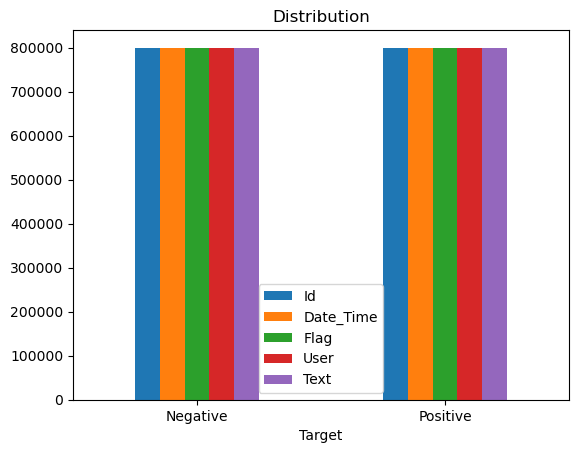

In [7]:
ax = data_frame.groupby('Target').count().plot(kind = 'bar', title = 'Distribution')
ax.set_xticklabels(['Negative', 'Positive'], rotation = 0)
text, sentiment = list(data_frame.Text), list(data_frame.Target)

<AxesSubplot:xlabel='Target', ylabel='count'>

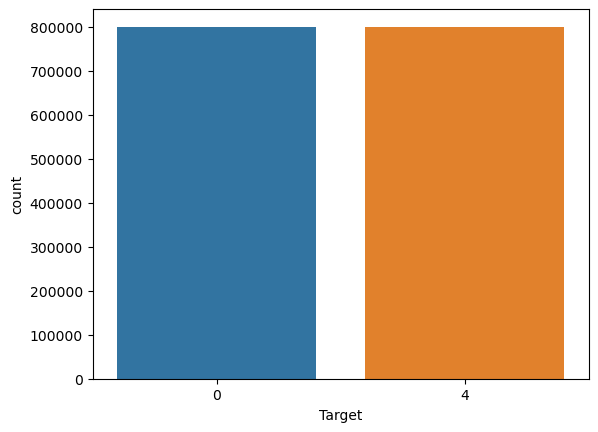

In [8]:
sn.countplot(x = 'Target', data = data_frame)

### Taking out 2 Columns - Text and Target

In [9]:
valid_df = data_frame[['Text', 'Target']]
valid_df

,Text,Target
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0
...,...,...
1599994,Just woke up. Having no school is the best fee...,4
1599995,TheWDB.com - Very cool to hear old Walt interv...,4
1599996,Are you ready for your MoJo Makeover? Ask me f...,4
1599997,Happy 38th Birthday to my boo of alll time!!! ...,4


## Cleaning
Representing Negative as 0

Representing Positive as 1

In [10]:
valid_df.Target.replace(4, 1, inplace = True)
valid_df

,Text,Target
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0
...,...,...
1599994,Just woke up. Having no school is the best fee...,1
1599995,TheWDB.com - Very cool to hear old Walt interv...,1
1599996,Are you ready for your MoJo Makeover? Ask me f...,1
1599997,Happy 38th Birthday to my boo of alll time!!! ...,1


### Separating Positive and Negative Data Frames

In [11]:
positive = valid_df[valid_df.Target == 1]
negative = valid_df[valid_df.Target == 0]
print(negative.head())
print()
print(positive.head())

                                                Text  Target
0  is upset that he can't update his Facebook by ...       0
1  @Kenichan I dived many times for the ball. Man...       0
2    my whole body feels itchy and like its on fire        0
3  @nationwideclass no, it's not behaving at all....       0
4                      @Kwesidei not the whole crew        0

                                                     Text  Target
799999       I LOVE @Health4UandPets u guys r the best!!        1
800000  im meeting up with one of my besties tonight! ...       1
800001  @DaRealSunisaKim Thanks for the Twitter add, S...       1
800002  Being sick can be really cheap when it hurts t...       1
800003    @LovesBrooklyn2 he has that effect on everyone        1


### Slicing Data - For calculation Purposes
Taking only 20,000 rows

In [12]:
positive = positive.iloc[: 20000]
negative = negative.iloc[: 20000]

### Merging the two data set

In [13]:
dataset = pd.concat([positive, negative])
dataset

,Text,Target
799999,I LOVE @Health4UandPets u guys r the best!!,1
800000,im meeting up with one of my besties tonight! ...,1
800001,"@DaRealSunisaKim Thanks for the Twitter add, S...",1
800002,Being sick can be really cheap when it hurts t...,1
800003,@LovesBrooklyn2 he has that effect on everyone,1
...,...,...
19995,One more day of holidays,0
19996,feeling so down right now .. i hate you DAMN H...,0
19997,"geez,i hv to READ the whole book of personalit...",0
19998,I threw my sign at donnie and he bent over to ...,0


### Converting the text in lowercase for ease of purpose

In [14]:
dataset['Text'] = dataset['Text'].str.lower()
dataset

,Text,Target
799999,i love @health4uandpets u guys r the best!!,1
800000,im meeting up with one of my besties tonight! ...,1
800001,"@darealsunisakim thanks for the twitter add, s...",1
800002,being sick can be really cheap when it hurts t...,1
800003,@lovesbrooklyn2 he has that effect on everyone,1
...,...,...
19995,one more day of holidays,0
19996,feeling so down right now .. i hate you damn h...,0
19997,"geez,i hv to read the whole book of personalit...",0
19998,i threw my sign at donnie and he bent over to ...,0


### Creating Stop Words List

In [15]:
stop_words = list(stopwords.words('english'))

### Removing Stop Words

In [16]:
def clean_stopWords(text) :
    return " ".join([word for word in str(text).split() if word not in stop_words])
dataset.Text = dataset.Text.apply(lambda text: clean_stopWords(text))
dataset.Text.head()

799999                love @health4uandpets u guys r best!!
800000    im meeting one besties tonight! cant wait!! - ...
800001    @darealsunisakim thanks twitter add, sunisa! g...
800002    sick really cheap hurts much eat real food plu...
800003                      @lovesbrooklyn2 effect everyone
Name: Text, dtype: object

### Creating Punctuations List

In [17]:
punctuations = string.punctuation

### Removing Punctuations

In [18]:
def clean_punctuation(text) :
    translator = str.maketrans('', '', punctuations)
    return text.translate(translator)
dataset.Text = dataset.Text.apply(lambda text: clean_punctuation(text))
dataset.Text.head()

799999                   love health4uandpets u guys r best
800000    im meeting one besties tonight cant wait  girl...
800001    darealsunisakim thanks twitter add sunisa got ...
800002    sick really cheap hurts much eat real food plu...
800003                       lovesbrooklyn2 effect everyone
Name: Text, dtype: object

### Removing repeating characters

In [19]:
def clean_repeating_char(text) :
    return re.sub(r'(.)+1', r'1', text)
dataset.Text = dataset.Text.apply(lambda text: clean_repeating_char(text))
dataset.Text.head()

799999                   love health4uandpets u guys r best
800000    im meeting one besties tonight cant wait  girl...
800001    darealsunisakim thanks twitter add sunisa got ...
800002    sick really cheap hurts much eat real food plu...
800003                       lovesbrooklyn2 effect everyone
Name: Text, dtype: object

### Removing URL's

In [20]:
def clean_URL(text) :
    return re.sub('((wwe.[^s]+)|(https?://[^s]+))', ' ', text)
dataset.Text = dataset.Text.apply(lambda text: clean_URL(text))
dataset.Text.tail()

19995                                     one day holidays
19996                     feeling right  hate damn humprey
19997    geezi hv read whole book personality types emb...
19998     threw sign donnie bent get thingee made sad face
19999    1 good thing find none ones like come size stu...
Name: Text, dtype: object

### Removing Numbers

In [21]:
def clean_numbers(text) :
    return re.sub('[0-9]+', '', text)
def clean_URL(text) :
    return re.sub('((wwe.[^s]+)|(https?://[^s]+))', ' ', text)
dataset.Text = dataset.Text.apply(lambda text: clean_numbers(text))
dataset.Text.tail()

19995                                     one day holidays
19996                     feeling right  hate damn humprey
19997    geezi hv read whole book personality types emb...
19998     threw sign donnie bent get thingee made sad face
19999     good thing find none ones like come size stup...
Name: Text, dtype: object

### Again Removing Stop Words

In [22]:
dataset.Text = dataset.Text.apply(lambda text: clean_stopWords(text))
dataset.Text.tail()

19995                                     one day holidays
19996                      feeling right hate damn humprey
19997    geezi hv read whole book personality types emb...
19998     threw sign donnie bent get thingee made sad face
19999    good thing find none ones like come size stupi...
Name: Text, dtype: object

### Tokenization
Reducing the text into list of words

In [23]:
def tokenization(text) :
    text = re.split('\W+', text)
    return text
dataset.Text = dataset.Text.apply(lambda text: tokenization(text.lower()))
dataset.Text.tail()

19995                                 [one, day, holidays]
19996                [feeling, right, hate, damn, humprey]
19997    [geezi, hv, read, whole, book, personality, ty...
19998    [threw, sign, donnie, bent, get, thingee, made...
19999    [good, thing, find, none, ones, like, come, si...
Name: Text, dtype: object

### Stemming
Stemming is the process of producing morphological variants of a root/base word. “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”.

In [24]:
st = nltk.PorterStemmer()
def stemming(text) :
    text = [st.stem(word) for word in text]
    return text
dataset.Text = dataset.Text.apply(lambda text: stemming(text))
dataset.Text.tail()

19995                                  [one, day, holiday]
19996                   [feel, right, hate, damn, humprey]
19997    [geezi, hv, read, whole, book, person, type, e...
19998    [threw, sign, donni, bent, get, thinge, made, ...
19999    [good, thing, find, none, one, like, come, siz...
Name: Text, dtype: object

### Creating Axis For Data Visualization

In [25]:
## creating axis
x = valid_df.Text
y = valid_df.Target

### Word Cloud for Negative Words

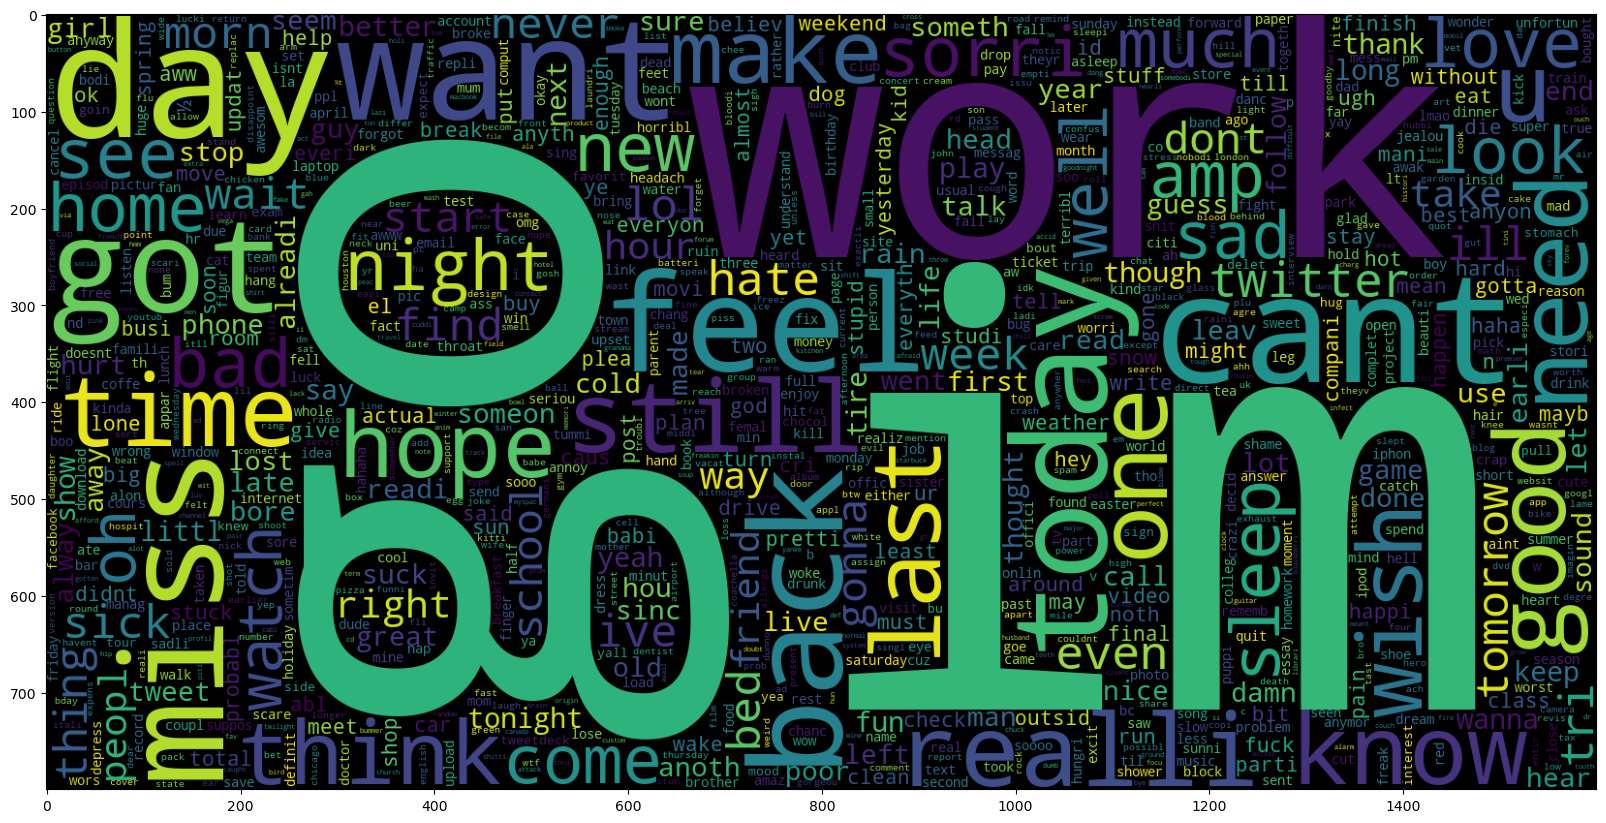

In [26]:
data_negative = list(dataset.Text[20000 : ])
ans = ''
for lis in data_negative :
    ans += ' '.join(lis)
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(ans)
plt.imshow(wc)

### Word Cloud for Positive Words

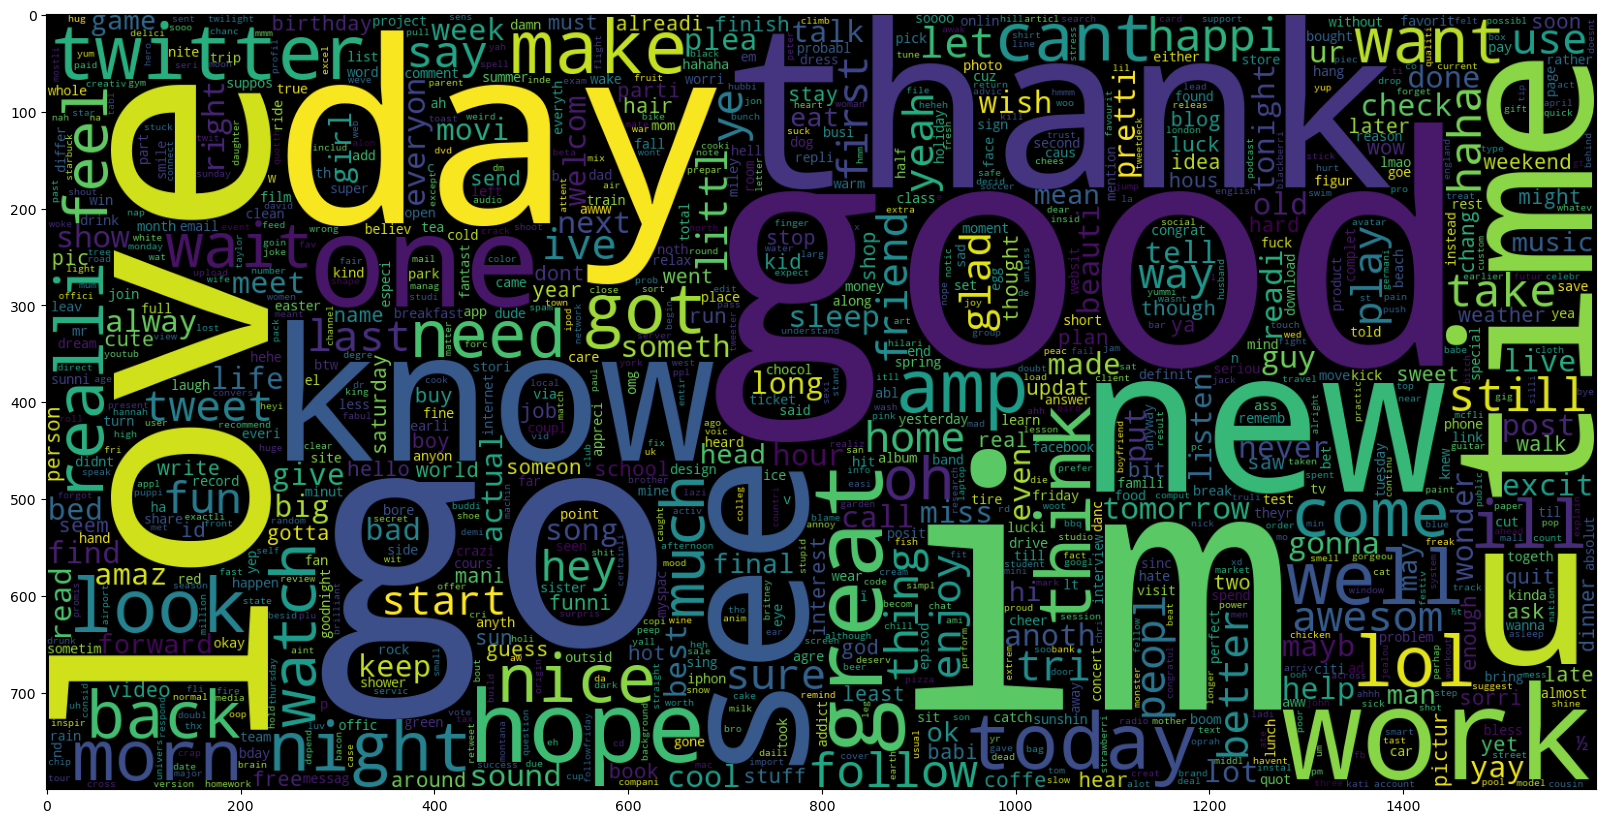

In [27]:
data_positive = list(dataset.Text[: 20000])
ans = ''
for lis in data_positive :
    ans += ' '.join(lis)
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(ans)
plt.imshow(wc)

## Training and Testing

### Creating Testing and Training Data

In [28]:
## separating 95% of data into training and 5% into testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state = 26105111)

### Training the model

In [29]:
vectoriser = TfidfVectorizer(ngram_range = (1, 2), max_features = 500000)
X_train = [str(doc) for doc in x_train]
vectoriser.fit(X_train)
print('Number of feature words :', len(vectoriser.get_feature_names()))

Number of feature words : 500000


## Model Evaluation

In [30]:
x_train = vectoriser.transform(x_train)
x_test = vectoriser.transform(x_test)

In [31]:
def model_evaluate(model) :
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative', 'Positive']
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Neg']
    cf_new_mat = cf_matrix.reshape(1, cf_matrix.size)
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sn.heatmap(cf_matrix, cmap = 'Blues', annot=labels, fmt = '', xticklabels = categories, yticklabels = categories)
    plt.xlabel('Predicted Values')
    plt.xlabel('Actual Values')
    plt.title('Confusion Matrix')

## Comparing Models

### Bernoulli Naive Bayes

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     40100
           1       0.79      0.81      0.80     39900

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



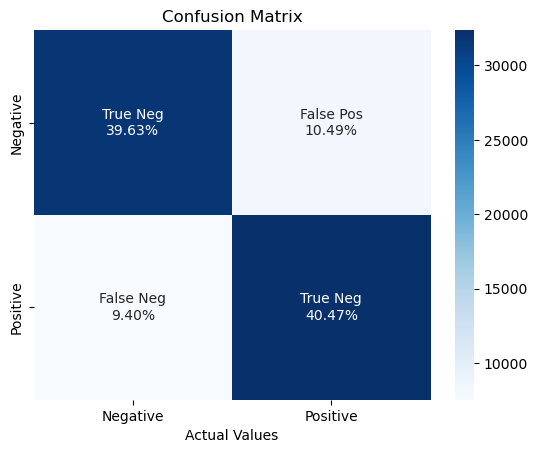

In [33]:
BNBmodel = BernoulliNB()
BNBmodel.fit(x_train, y_train)
model_evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(x_test)

###  Support Vector Machine

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     40100
           1       0.81      0.83      0.82     39900

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



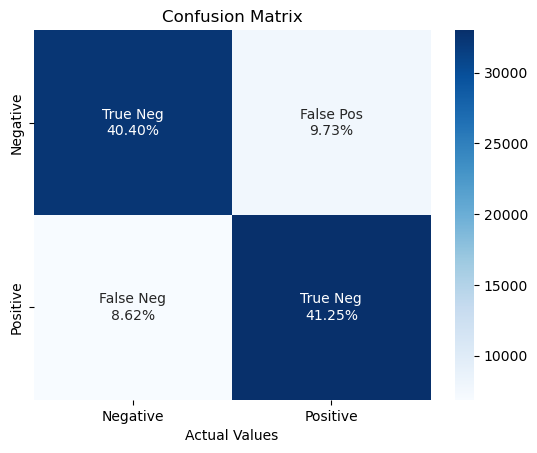

In [34]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)
model_evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(x_test)

###  Logistic Regression

              precision    recall  f1-score   support

           0       0.83      0.81      0.82     40100
           1       0.82      0.84      0.83     39900

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



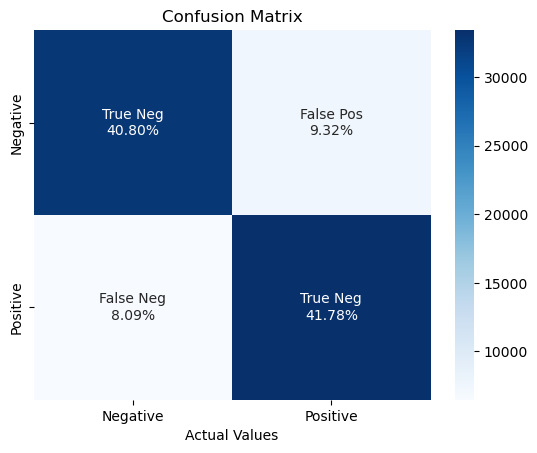

In [35]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs = -1)
LRmodel.fit(x_train, y_train)
model_evaluate(LRmodel)
y_pred3 = LRmodel.predict(x_test)

### Area Under ROC Curve

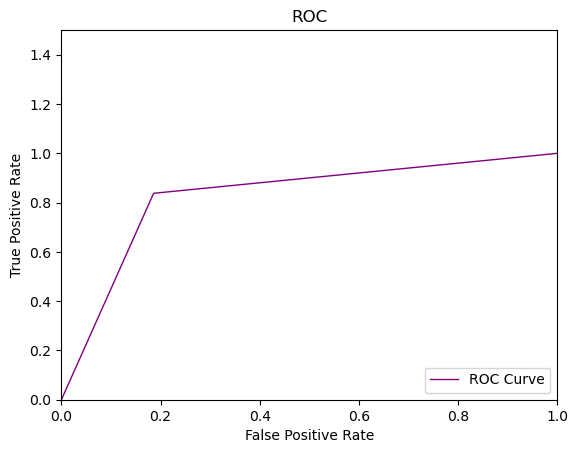

In [36]:
fpr, tpr, threshold = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color = 'purple', lw = 1, label = 'ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.5])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc = "lower right")
plt.show()